<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Linear Algebra <br>
<font color=2565AE size=5>
Computer Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 3 <br>
<font color=3C99D size=5>
Diagonalization, Eigenvectors and Decomposition <br>
<font color=696880 size=4>
<!-- <br> -->
Mahdi Alinejad - Mahan Bayhaghi

____


<h3 style='color: green;'>Purpose</h3>
In this notebook, we will explore eigenvalues and eigenvectors, and demonstrate diagonalization of a matrix. We will also compare the performance of computing matrix powers using regular methods versus diagonalization.

<h3 style='color: green;'>Student Information</h3>

In [ ]:
student_number = '401105848'
first_name = 'Fatemeh'
last_name = 'Hamdi'

<h3 style='color: green;'>Imports</h3>
import the necessary libraries.

In [ ]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import timeit

<h3 style='color: green;'>Eigenvalues and Eigenvectors</h3>
Eigenvalues and eigenvectors are fundamental concepts in linear algebra. For a given square matrix A, if there is a non-zero vector v such that Av = λv, then λ is called the eigenvalue and v is the corresponding eigenvector.

<h3 style='color: green;'>Functions for Eigenvalues and Eigenvectors</h3>
We will define functions to compute eigenvalues and eigenvectors.

In [ ]:
import numpy as np
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import timeit

def compute_eigenvalues(A):
    a, b, c, d = A[0, 0], A[0, 1], A[1, 0], A[1, 1]
    trace = a + d
    determinant = a * d - b * c
    eigenvalue1 = (trace + np.sqrt(trace**2 - 4 * determinant)) / 2
    eigenvalue2 = (trace - np.sqrt(trace**2 - 4 * determinant)) / 2
    return [eigenvalue1, eigenvalue2]

def compute_eigenvector(A, eigenvalue):
    I = np.eye(A.shape[0])
    A_lambdaI = A - eigenvalue * I
    if A_lambdaI[0, 0] != 0 or A_lambdaI[0, 1] != 0:
        eigenvector = np.array([-A_lambdaI[0, 1], A_lambdaI[0, 0]])
    else:
        eigenvector = np.array([-A_lambdaI[1, 1], A_lambdaI[1, 0]])
    eigenvector = eigenvector / np.sqrt(np.dot(eigenvector, eigenvector))
    return eigenvector

def compute_eigenvectors(A):
    eigenvalues = compute_eigenvalues(A)
    eigenvectors = np.column_stack([compute_eigenvector(A, ev) for ev in eigenvalues])
    return eigenvectors


<h3 style='color: green;'>Visualization of Vectors</h3>
We will write a function to visualize vectors in 2D.

In [ ]:
def plot_vectors(vectors, colors, labels, title):
    plt.figure()
    plt.axhline(0, color='gray', lw=0.5)
    plt.axvline(0, color='gray', lw=0.5)
    plt.grid()
    for vector, color, label in zip(vectors, colors, labels):
        plt.quiver(0, 0, vector[0], vector[1], angles='xy', scale_units='xy', scale=1, color=color, label=label)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.legend()
    plt.title(title)
    plt.show()


<h3 style='color: green;'>Example with a Random Matrix</h3>
We will generate a random 2D matrix with two independent eigenvectors and visualize them along with a random vector. Then we apply the transformation and plot them again.

### no need to change the below cells

In [ ]:
def generate_valid_matrix():
    while True:
        A = np.random.rand(2, 2)
        eigenvalues = np.linalg.eigvals(A)
        if (np.all(np.isreal(eigenvalues)) and
            len(set(eigenvalues)) == 2 and
            np.all(np.abs(eigenvalues) > 0.33) and
            np.all(np.abs(eigenvalues) < 3)):
            return A

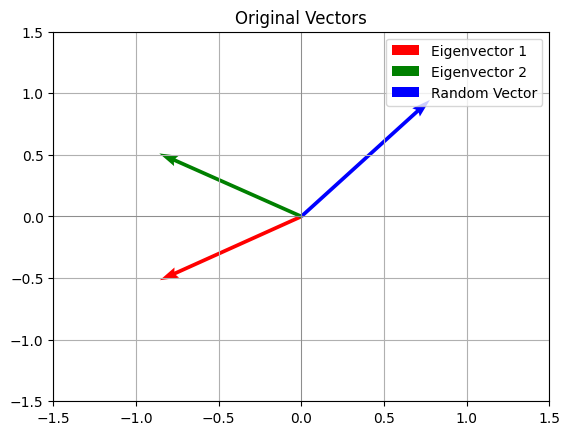

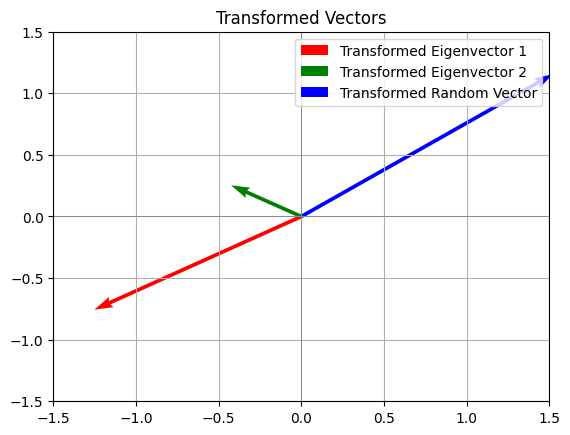

In [ ]:
A = generate_valid_matrix()
eigenvectors = compute_eigenvectors(A)

random_vector = np.random.rand(2)

plot_vectors([eigenvectors[:, 0], eigenvectors[:, 1], random_vector],
             ['r', 'g', 'b'],
             ['Eigenvector 1', 'Eigenvector 2', 'Random Vector'],
             'Original Vectors')

transformed_vectors = [A @ eigenvectors[:, 0], A @ eigenvectors[:, 1], A @ random_vector]

plot_vectors(transformed_vectors,
             ['r', 'g', 'b'],
             ['Transformed Eigenvector 1', 'Transformed Eigenvector 2', 'Transformed Random Vector'],
             'Transformed Vectors')

<h3 style='color: red;'>Question</h3>
explain this behavior of these vectors in 2D plain

<h3 style='color: yellow;'>Your answer</h3>

When dealing with the computation of matrix powers, the process can often be quite time-consuming and computationally intensive, especially for large matrices. One effective method to speed up this process is through diagonalization. By expressing a matrix ( A ) as ( A = PDP^{-1} ), where ( P ) is a matrix of eigenvectors and ( D ) is a diagonal matrix of eigenvalues, we can simplify the calculation of ( A^k ) to ( A^k = PDkP{-1} ). Since raising a diagonal matrix to a power is straightforward, this approach can significantly reduce the complexity and time required for matrix power computations.

<h3 style='color: green;'>Diagonalization</h3>
Diagonalization of a matrix involves finding a matrix P and a diagonal matrix D such that A = PDP^(-1). This is possible if A has n linearly independent eigenvectors.

In [ ]:
def diagonalize(A):
    eigenvalues = compute_eigenvalues(A)
    eigenvectors = compute_eigenvectors(A)
    P = eigenvectors
    D = np.diag(eigenvalues)
    P_inv = np.linalg.inv(P)

    return P, D, P_inv

to check your answer use the cells below

In [ ]:
def check_diagonalization(D, A):
    is_diagonal = np.allclose(D, np.diag(np.diagonal(D)))
    eigenvalues_A = np.linalg.eigvals(A)
    diagonal_entries_D = np.diagonal(D)
    has_correct_diagonal = np.allclose(np.sort(eigenvalues_A), np.sort(diagonal_entries_D))
    has_all_eigenvalues = len(set(diagonal_entries_D)) >= len(set(eigenvalues_A))

    if is_diagonal and has_correct_diagonal and has_all_eigenvalues:
        display(HTML('<font color="green">All conditions satisfied:</font> Matrix D properly diagonalizes matrix A.'))
    else:
        if not is_diagonal:
            display(HTML('<font color="red">Error:</font> Matrix D is not diagonal.'))
        if not has_correct_diagonal:
            display(HTML('<font color="red">Error:</font> Diagonal entries of D are not eigenvalues of A.'))
        if not has_all_eigenvalues:
            display(HTML('<font color="red">Error:</font> D does not include all eigenvalues of A.'))


In [ ]:
A = generate_valid_matrix()
p, D, p_inverse = diagonalize(A)
check_diagonalization(D, A)

<h3 style='color: green;'>Properties of Diagonalized Matrix</h3>
A diagonalized matrix has its eigenvalues on the diagonal. It is easier to compute powers of a diagonal matrix.

<h3 style='color: red;'>Question</h3>
How do you think we can speed up the process of calculating powers of a matrix by using diagonalization?

<h3 style='color: yellow;'>Your answer:</h3>

we have A = PDP^(-1), so A^2 = PDP^-1P^(-1)DP = PD^2P^-1. by generalizing it we get A^n = PD^nP^-1. since D is diagonal, the non zero elements (eigenvalues) raise to power of n.


<h3 style='color: green;'>Performance Comparison</h3>
We will compare the time taken to compute matrix powers using regular methods versus diagonalization.

First, we will compute the powers of a matrix using the regular method.

In [ ]:
def compute_powers(A, n):
    result = A
    for _ in range(n-1):
        result = result @ A
    return result

In [ ]:
n_values = range(1, 400)

In [ ]:
regular_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers(A, n))
    regular_times.append(timer.timeit(number=1))

Next, we will use your method for calculating power of a matrix.

In [ ]:
def compute_powers_your_way(A, n):
    P, D, P_inverse = diagonalize(A)
    shape = D.shape
    D = np.diag(D.diagonal()**n)
    return ((P@D)@P_inverse)

In [ ]:
diagonal_times = []

for n in n_values:
    timer = timeit.Timer(lambda: compute_powers_your_way(A, n))
    diagonal_times.append(timer.timeit(number=1))

Finally, we will plot the results to compare the performance of both methods.

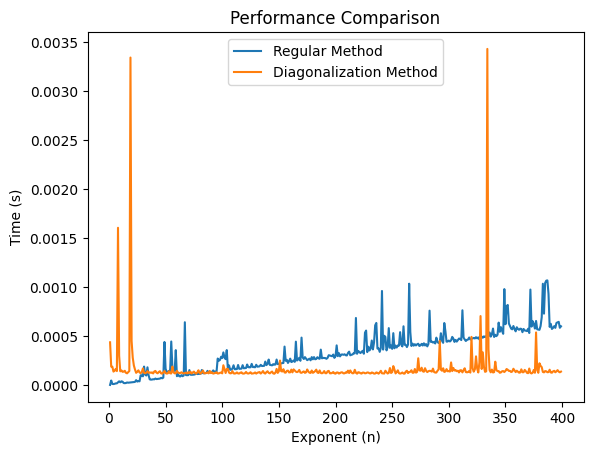

In [ ]:
plt.plot(n_values, regular_times, label='Regular Method')
plt.plot(n_values, diagonal_times, label='Diagonalization Method')
plt.xlabel('Exponent (n)')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Performance Comparison')
plt.show()

<h3 style='color: green;'>Background: </h3>

QR decomposition is a matrix factorization technique that decomposes a matrix
𝐴
into an orthogonal matrix
𝑄
and an upper triangular matrix
𝑅
R. The Gram-Schmidt process is a method for orthogonalizing a set of vectors in an inner product space, which forms the basis of this decomposition.

<h3 style='color: green;'>Gram-Schmidt Process: </h3>

A method to orthogonalize a set of vectors in an inner product space.

<h3 style='color: green;'>Theory: </h3>

Given a matrix
$ 𝐴 ∈ 𝑅^{𝑚 × 𝑛} $ , QR decomposition aims to find an orthogonal matrix
$ Q ∈ 𝑅^{𝑚 × 𝑛} $ and an upper triangular matrix  $ R ∈ 𝑅^{n × 𝑛} $ such that:
$ A = Q R $

**In the section below, implement QR decompostion step by step :**

In [140]:
def gram_schmidt(A):
    m, n = A.shape

    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for i in range(n):
        v = A[:, i]

        for j in range(i):
            R[j, i] = np.dot(Q[:, j], A[:, i])
            v = v - R[j, i] * Q[:, j]

        R[i, i] = np.sqrt(np.dot(v, v))
        Q[:, i] = v / R[i, i]

    return Q, R

Now, let's check if the decompostion. No need to change the following cell.

In [141]:
def test_QR_decomposition():
    A = np.random.random((4, 4))
    Q, R = gram_schmidt(A)
    print("Matrix A:")
    print(A)
    print("\nOrthogonal matrix Q:")
    print(Q)
    print("\nUpper triangular matrix R:")
    print(R)
    print(f"\nCheck A = QR: {np.allclose(A, np.dot(Q, R))}")
    print(f"\nCheck Q^T Q = I: {np.allclose(np.dot(Q.T, Q), np.eye(Q.shape[1]))}")

test_QR_decomposition()

Matrix A:
[[0.51590872 0.35614476 0.10472051 0.08283474]
 [0.8122974  0.51199944 0.51110576 0.0512369 ]
 [0.60428004 0.34765692 0.84122058 0.57872721]
 [0.03986076 0.50500055 0.00247251 0.39160534]]

Orthogonal matrix Q:
[[ 0.45375205  0.05181511 -0.58072027  0.67393489]
 [ 0.71443182 -0.01959177 -0.21566807 -0.66534999]
 [ 0.5314764  -0.08353338  0.77967136  0.32041782]
 [ 0.03505834  0.99496409  0.0914539  -0.02129706]]

Upper triangular matrix R:
[[ 1.13698378  0.72986604  0.85984294  0.39550059]
 [ 0.          0.48183916 -0.0723973   0.34457848]
 [ 0.          0.          0.4850592   0.4278769 ]
 [ 0.          0.          0.          0.19882922]]

Check A = QR: True

Check Q^T Q = I: True


In this section, we will implement [Househodler reflection](https://en.wikipedia.org/wiki/Householder_transformation) method to compute QR decomposition.

<h3 style='color: green;'>Concept of Householder Reflections: </h3>

Householder reflections are used to zero out specific elements of a vector or matrix. A Householder reflection is defined by a vector
𝑣 and it generates a matrix  𝐻 such that:
$$ 𝐻 = 𝐼 − 2𝑣𝑣^𝑇 $$
where  𝑣 is a unit vector. This transformation is used to reflect a vector about a plane or hyperplane. When applied to a vector, it can zero out all elements below the first one, which is useful for transforming a matrix into an upper triangular form.

<h3 style='color: green;'>Using Householder Reflections for QR Decomposition: </h3>

The goal is to decompose a matrix
𝐴 into an orthogonal matrix 𝑄 and an upper triangular matrix 𝑅. Householder reflections are used to systematically zero out the sub-diagonal elements of
𝐴 transforming it into
𝑅. The orthogonal matrix
𝑄 is the product of all Householder matrices used in the process.

In [142]:
def householder_reflection(a):
    v = a.copy()
    v[0] += np.sign(a[0]) * np.sqrt(np.sum(a**2))
    v = v / np.sqrt(np.sum(v**2))
    H = np.eye(len(a)) - 2 * np.outer(v, v)
    return H

def qr_householder(A):
    m, n = A.shape
    Q = np.eye(m)
    R = A.copy()

    for i in range(min(m, n)):
        H_i = np.eye(m)
        H = householder_reflection(R[i:, i])
        H_i[i:, i:] = H

        R = H_i @ R
        Q = Q @ H_i.T

    return Q, R


Now, let's check if the decompostion.


In [143]:
test_QR_decomposition()

Matrix A:
[[0.59964592 0.66173894 0.52893697 0.0781634 ]
 [0.66441261 0.01623051 0.46444371 0.49254343]
 [0.091182   0.59071872 0.87570394 0.87417935]
 [0.53419016 0.73243081 0.16139877 0.24164685]]

Orthogonal matrix Q:
[[ 0.57312425  0.23970899 -0.02244179 -0.78330362]
 [ 0.63502638 -0.61738364  0.38141132  0.26477224]
 [ 0.08714913  0.64001576  0.72507591  0.23885095]
 [ 0.51056353  0.38955984 -0.57296308  0.50919675]]

Upper triangular matrix R:
[[1.0462756  0.81499851 0.75680177 0.55713544]
 [0.         0.81199924 0.4633898  0.36827268]
 [0.         0.         0.7077501  0.68149918]
 [0.         0.         0.         0.40103051]]

Check A = QR: True

Check Q^T Q = I: True


<h3 style='color: green;'> Calculating Eigenvalues Using QR Decomposition </h3>

Eigenvalues and eigenvectors are fundamental concepts in linear algebra, playing a crucial role in various mathematical and scientific applications. One efficient method to compute eigenvalues of a matrix is through QR decomposition. In this section, we will use QR decomposition to estimate eigenvalues and eigenvectors.

The QR algorithm utilizes QR decomposition iteratively to approximate eigenvalues of $ A $. Here’s a step-by-step outline of how this process works:

1. **Initial Setup:**
   - Start with a square matrix $ A $.

2. **QR Decomposition Iteration:**
   - Decompose $ A $ into $ Q $ and R such that:

     $$ A^{(0)} = Q^{(0)} R^{(0)} $$

   - Update $ A $ iteratively:

     $$ A^{(k)} = R^{(k-1)} Q^{(k-1)} $$
   - Convergence is typically checked by ensuring $ A^{(k)} $ becomes increasingly upper triangular or converges to a diagonal matrix.

3. **Extracting Eigenvalues:**
   - After convergence, the diagonal elements of the upper triangular matrix $ A^{(k)} $ are the eigenvalues of $ A $.

In [161]:
def svd_jacobi(M):
  DBL_EPSILON = 1.0e-15  # approximately
  A = np.copy(M)  # working copy U
  m = len(A)
  n = len(A[0])

  Q = np.eye(n)  # working copy V
  t = np.zeros(n)  # working copy s

  # init counters
  count = 1
  sweep = 0
  sweep_max = max(5 * n, 12)  # heuristic

  tolerance = 10 * m * DBL_EPSILON  # heuristic
  # store the column error estimates in t
  for j in range(n):
    cj = A[:, j]  # get col j
    sj = np.linalg.norm(cj)
    t[j] = DBL_EPSILON * sj

  # orthogonalize A by plane rotations
  while (count > 0 and sweep <= sweep_max):
    # initialize rotation counter
    count = n * (n - 1) / 2;
    for j in range(n-1):
      for k in range(j+1, n):
        cj = A[:, j]
        ck = A[:, k]
        p = 2 * np.dot(cj, ck)
        a = np.linalg.norm(cj)
        b = np.linalg.norm(ck)

        # test for columns j,k orthogonal,
        # or dominant errors
        abserr_a = t[j]
        abserr_b = t[k]

        q = (a * a) - (b * b)
        v = np.sqrt(p**2 + q**2)  # hypot()

        sorted = (a >= b)
        orthog = (abs(p) <= tolerance * (a*b))
        noisya = (a < abserr_a)
        noisyb = (b < abserr_b)

        if sorted and (orthog or \
          noisya or noisyb):
          count -= 1
          continue

        # calculate rotation angles
        if v == 0 or sorted == False:
          cosine = 0.0
          sine = 1.0
        else:
          cosine = np.sqrt((v + q) / (2.0 * v))
          sine = p / (2.0 * v * cosine)

        # apply rotation to A (U)
        for i in range(m):
          Aik = A[i][k]
          Aij = A[i][j]
          A[i][j] = Aij * cosine + Aik * sine
          A[i][k] = -Aij * sine + Aik * cosine

        # update singular values
        t[j] = abs(cosine) * abserr_a + \
          abs(sine) * abserr_b
        t[k] = abs(sine) * abserr_a + \
          abs(cosine) * abserr_b

        # apply rotation to Q (V)
        for i in range(n):
          Qij = Q[i][j]
          Qik = Q[i][k]
          Q[i][j] = Qij * cosine + Qik * sine
          Q[i][k] = -Qij * sine + Qik * cosine

    sweep += 1
  # while

  # compute singular values
  prev_norm = -1.0
  for j in range(n):
    column = A[:, j]  # by ref
    norm = np.linalg.norm(column)
    # determine if singular value is zero
    if norm == 0.0 or prev_norm == 0.0 or \
      (j > 0 and norm <= tolerance * prev_norm):
      t[j] = 0.0
      for i in range(len(column)):
        column[i] = 0.0  # updates A indirectly
      prev_norm = 0.0
    else:
      t[j] = norm
      for i in range(len(column)):
        column[i] = column[i] * (1.0 / norm)
      prev_norm = norm

  if count > 0:
    print("Jacobi iterations no converge")

  U = A  # mxn
  s = t
  Vh = np.transpose(Q)

  if m < n:
    U = U[:, 0:m]
    s = t[0:m]
    Vh = Vh[0:m, :]

  return U, s, Vh

def qr_algorithm(A, num_iterations=100000, tol=1e-10):
    n = A.shape[0]
    Q_total = np.eye(n)
    A_k = A.copy()

    for _ in range(num_iterations):
        Q, R = qr_householder(A_k)
        A_k = R @ Q
        Q_total = Q_total @ Q
        # Check for convergence: ensure the off-diagonal elements are small
        off_diagonal_norm = np.sqrt(np.sum(np.tril(A_k, -1)**2))
        if off_diagonal_norm < tol:
            break

    eigenvalues = np.diag(A_k)
    return eigenvalues, Q_total

def compute_eigenvectors(A, eigenvalues):
    n = A.shape[0]
    eigenvectors = np.zeros((n, n))

    for i, eigenvalue in enumerate(eigenvalues):
        I = np.eye(n)
        A_shifted = A - eigenvalue * I
        _, _, Vt = svd_jacobi(A_shifted)
        eigenvector = Vt.T[:, -1]
        eigenvectors[:, i] = eigenvector

    return eigenvectors

Let's verify our results. no need to change the following cell.

In [162]:
def test_qr_algorithm():
    A = np.random.random((4,4))
    eigenvalues, Q_total = qr_algorithm(A)
    eigenvectors = compute_eigenvectors(A, eigenvalues)
    print("Matrix A:")
    print(A)
    print("\nEigenvalues (QR Algorithm):")
    print(eigenvalues)
    print("\nEigenvectors (QR Algorithm):")
    print(eigenvectors)
    print("\nVerification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):")
    print(np.allclose(A @ eigenvectors, eigenvectors @ np.diag(eigenvalues)))
    np_eigenvalues, np_eigenvectors = np.linalg.eig(A)
    np_eigenvalues = np_eigenvalues.real
    print("\nEigenvalues (NumPy):")
    print(np_eigenvalues)
    print("\nEigenvectors (NumPy):")
    print(np_eigenvectors)
    print("\nVerification with NumPy (Eigenvalues):")
    print(np.allclose(np.sort(eigenvalues), np.sort(np_eigenvalues)))

test_qr_algorithm()

Matrix A:
[[0.35875106 0.33211415 0.45662821 0.06731783]
 [0.12337256 0.0898719  0.34448995 0.65820605]
 [0.49631928 0.64842495 0.50396733 0.25176895]
 [0.66483895 0.92902921 0.0846048  0.94301271]]

Eigenvalues (QR Algorithm):
[ 1.76487343  0.52770379 -0.46779701  0.07082279]

Eigenvectors (QR Algorithm):
[[ 0.28217713  0.62832991 -0.07703173 -0.83857078]
 [ 0.40514148 -0.25141785  0.79830487  0.52224365]
 [ 0.46601802  0.49560069 -0.37233003  0.13868248]
 [ 0.73420954 -0.54439925 -0.46706081  0.06948224]]

Verification (A @ eigenvectors - eigenvectors @ np.diag(eigenvalues)):
True

Eigenvalues (NumPy):
[ 1.76487343 -0.46779701  0.07082279  0.52770379]

Eigenvectors (NumPy):
[[-0.28217713  0.07703173  0.83857078 -0.62832991]
 [-0.40514148 -0.79830487 -0.52224365  0.25141785]
 [-0.46601802  0.37233003 -0.13868248 -0.49560069]
 [-0.73420954  0.46706081 -0.06948224  0.54439925]]

Verification with NumPy (Eigenvalues):
True


<h3 style='color: green;'> Conclusion: </h3>


QR decomposition offers a powerful method for computing eigenvalues numerically. Its iterative nature makes it suitable for matrices of varying sizes and complexities, providing a robust approach to solving eigenvalue problems in practice.
